In [49]:
PATHS = [r"..\data\processed\kerryn_dec\M0.pickle"]

APPLY_TRANSFORMS = True
NUM_IMAGES = 20
OUT_DIR = "figs"

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
from utils import *

import torch
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch import nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

from MacDataset import MacDataset
import matplotlib.pyplot as plt
import numpy as np
import random

In [51]:
transforms = transforms.Compose([
    standardize_input()
    ])

In [52]:
raw_images = []
raw_labels = []
for i, path in enumerate(PATHS):
    path_data = pickle.load(open(path, "rb"))
    path_data["labels"][:] = i
    raw_images.append(path_data["images"])
    raw_labels.append(path_data["labels"])

min_len = sum([len(label) for label in raw_labels])
balanced_images = []
balanced_labels = []
for i in range(len(raw_labels)):
    num_samples = len(raw_labels[i])
    if  num_samples < min_len:
        min_len = num_samples

for i in range(len(raw_labels)):
    num_samples = len(raw_labels[i])
    raw_idx = list(range(num_samples))
    random.shuffle(raw_idx)
    raw_idx = raw_idx[:min_len]
    balanced_images.append(raw_images[i][raw_idx])
    balanced_labels.append(raw_labels[i][raw_idx])

images = np.vstack(balanced_images)[:,[0],:,:]
labels = np.hstack(balanced_labels)


In [53]:
data = None
if APPLY_TRANSFORMS:
    data = MacDataset(images, labels, transform=transforms)
else:
    data = MacDataset(images, labels)
        
sampler = equal_classes_sampler(data.labels)       
dataloader = DataLoader(data, batch_size=1, sampler=sampler,
                        shuffle=False, num_workers=0)       
dataiter = iter(dataloader)                                          

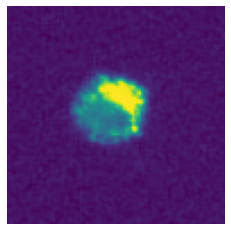

In [57]:
import os
os.makedirs(OUT_DIR, exist_ok=True) 
for i in range(len(dataiter)):
    image, label = dataiter.next()
    label_name = ["alveolar", "bone marrow", "monocyte"]
    image = np.array(image[0][0])
    label = int(label.item())
    plt.imshow(image)
    plt.axis('off')
    plt.savefig(OUT_DIR + "/" + label_name[label] + "_" + str(i), bbox_inches='tight')

    if i == NUM_IMAGES:
        break